# Python Exercises for Hughes and Hase:Chapter 5

Python activities to complement Measurements and their Uncertainties, Chapter 5, "Data visualization and reduction." Section numbers in the book correspond to those listed below.

Author: J. S. Dodge, 2016
## 5.1 Producing a good graph
## 5.1.1 The independent and dependent variables

Consider the data tabulated in Prob. (5.3), taken from an experiment to verify Ohm's law.

In [149]:
import numpy as np
import matplotlib.pyplot as plt

current = np.arange(10, 100, 10)    # (uA)
voltage = np.array([0.98, 1.98, 2.98, 3.97, 4.95, 5.95, 6.93, 7.93, 8.91])   # (mV)


The problem states that the voltmeter precision is 0.01 mV, and that the uncertainty in the current is negligible. This suggests we use the current as the independent variable. Plot data points using markers. 
<--- link to 'plot documentation' --->
Python provides several choices; see the plot documentation. Use black circles (ko) here. 

Text(0, 0.5, 'Voltage (mV)')

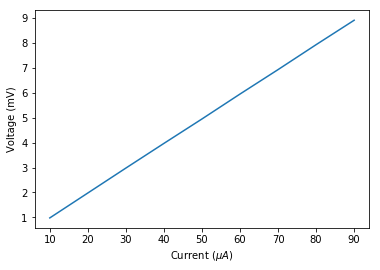

In [150]:
plt.plot(current, voltage)
plt.xlabel('Current ($\mu A$)')
plt.ylabel('Voltage (mV)')

Linearizing a graph can be a very effective way to demonstrate the validity of certain functional relationships between two quantities. Consider first the example given in the text, the period $T$ of a pendulum as a function of its length $L$. Use the random number generator to simulate period measurements with a constant standard error $\alpha_T = 0.03$ s, with pendulum lengths ranging from 10 cm to 100 cm. Use T for the model prediction, and Tm for the simulated measurements. 

Text(0, 0.5, 'Period (s)')

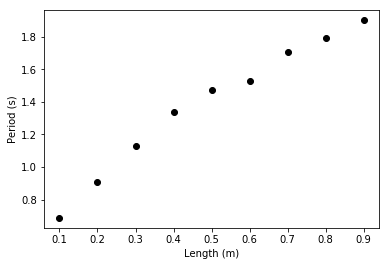

In [151]:
L = np.arange(0.1, 1.0, 0.1)  # (m)
g = 9.8 # (m/s^2)
T = 2 * np.pi * np.sqrt(L/g)  # (s)

np.random.seed(0)
alpha_t = 0.03

Tm = T + alpha_t * np.random.randn(np.size(T))

plt.plot(L,Tm,'ko');
plt.xlabel('Length (m)')
plt.ylabel('Period (s)')

Yet another way to linearize the same data is to use a *loglog plot*. These are useful for identifying a power-law relationship between two quantities, i.e.,

$$y = A x^\alpha $$

where $A$ and $\alpha$ are unknown. Taking the logarithm of both sides yields a linear relatonship between $y$ and $x$:
$$log y = log A + \alpha \log x $$

Use *loglog* to demonstrate this with the *L*, *Tm* data. Show the data as black circles (ko), and add a red line (r-) to show the model behavior, *T*, and a blue dashed line (b--) to show sqrt(L), to demonstrate the advantage of using *loglog* to identify a power-law functional dependence. The data fall approximately on a straight line, with a *slope* similar to the plot of *sqrt(L)* versus *L*.

Text(0, 0.5, 'Period (s)')

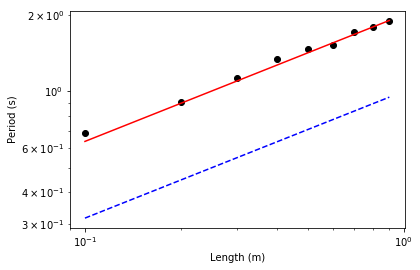

In [133]:
plt.loglog(L, Tm, 'ko', L, T, 'r-', L, np.sqrt(L), 'b--')
plt.xlabel('Length (m)')
plt.ylabel('Period (s)')

Yet another common linearization method uses the *semilogx* and *semilogy* functions, which is useful to demonstrate an *exponential* functional dependence. Consider, for example, the voltage across a 47 nF capacitor as it discharges from an initial value of 1 V across a 100 kOhm resistor. Add noise with a 10 microvolt amplitude using the random number generator.

In [134]:
x = np.linspace(0,100)    # s
R = 100e3             # Ohm
C = 47e-9             # Farad
tau = R * C * 1000         # ms
V0 = 1                 # V
alphaV = 10e-6         # V

V = V0*np.exp(-x/tau)
Vm = V + alphaV*np.random.randn(np.size(V))

First plot the data using linear scales.

Text(0, 0.5, 'Voltage (V)')

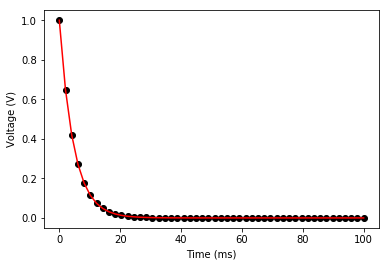

In [135]:
plt.plot(x,Vm,'ko',x,V,'r-')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (V)')

First plot the data using linear scales.

Text(0, 0.5, 'Voltage (V)')

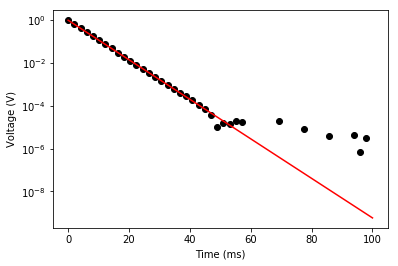

In [136]:
plt.semilogy(x,Vm,'ko',x,V,'r-')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (V)')

The linear plot shows little variation for t greater than 20 ms, while the *semilog* plot allows this data to be visualized much more effectively. The model function appears as a straight line on the *semilogy* plot, while the data follows a straight line for t less than about 50 ms. As t increases above 50 ms, the noise begins to dominate and the voltage fluctuates randomly with a 10 microvolt width about zero. About half of these fluctuations have negative values that must be excluded from the plot because their logarithm is undefined.
<--- Python; no warning for ingnored negative number! --->

MATLAB issues a warning: negative data ignored statement to let you know. 

Most of the remaining positive values are greater than 1 microvolt: with 10 microvolt Gaussian noise centered at zero, it is more than ten times more likely that the voltage will be greater than one microvolt than between one microvolt and zero.

## 5.1.3 Appropriate scales for the axes
Python plotting functions compute the axis limits automatically from the data range, but the user can override these choices. In the current-voltage plot above, for example, we can use [ylim](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.ylim.html) to readjust the vertical scale so that the data lies closer to the diagonal. This allows the viewer to identify the proportionality relationship more easily, and it is also more appealing visually.

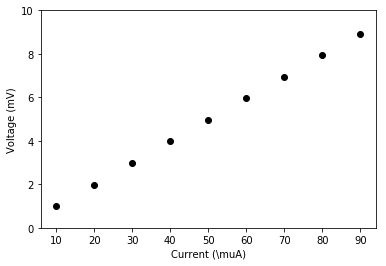

In [137]:
plt.plot(current, voltage, 'ko');
plt.xlabel('Current (\muA)')
plt.ylabel('Voltage (mV)')

plt.ylim([0, 10]);

We can also rescale the the pendulum period to include the origin; this makes it clear that *T* has a nonlinear relationship with *L*. The *ylim* function requires a two-element vector input, \[*ymin*, *ymax*\]. To set *ymin* without changing *ymax*, get the limits by calling *ylim* without any argument, changing the first element, then calling *ylim* again with the modified vector as an argument.

(0.6269502835103188, 1.9616649716911134)
<class 'tuple'>


(0, 1.9616649716911134)

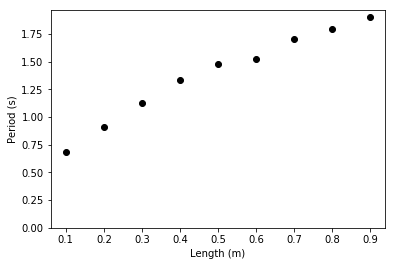

In [138]:
plt.plot(L,Tm,'ko');
plt.xlabel('Length (m)')
plt.ylabel('Period (s)')

yl = plt.ylim();
print(yl)
print(type(yl))

# notice that yl is tuple and you can not change its values. i.e. yl[0] = 0 with return an error
# change the lower limit of the y-axis:

plt.ylim(bottom=0)

<- basics of [plots](https://matplotlib.org/faq/usage_faq.html) in Python ->

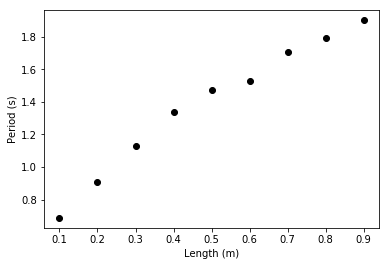

In [139]:
plt.plot(L,Tm,'ko')
plt.xlabel('Length (m)')
plt.ylabel('Period (s)')

ax = plt.gca()

Notice that *plt.gca* is a function and 

plt.gca is a  <class 'matplotlib.axes._subplots.AxesSubplot'>
[<matplotlib.lines.Line2D object at 0x7f09474205f8>, <matplotlib.spines.Spine object at 0x7f09473ebeb8>, <matplotlib.spines.Spine object at 0x7f09473eba90>, <matplotlib.spines.Spine object at 0x7f09473ebb00>, <matplotlib.spines.Spine object at 0x7f09473eb908>, <matplotlib.axis.XAxis object at 0x7f09473ebf98>, <matplotlib.axis.YAxis object at 0x7f09473eb1d0>, Text(0.5, 1.0, ''), Text(0.0, 1.0, ''), Text(1.0, 1.0, ''), <matplotlib.patches.Rectangle object at 0x7f0947410080>]


[0, 1, 0, 2]

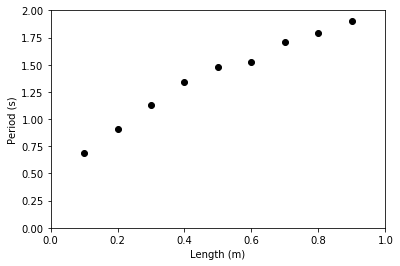

In [140]:
plt.plot(L,Tm,'ko')
plt.xlabel('Length (m)')
plt.ylabel('Period (s)')

ax = plt.gca()

print('plt.gca is a ', type(ax))
print(ax.get_children())

fig = plt.gcf()
ax.axis([0, 1, 0, 2])



<--- Talk about gca and other properites of a plot in Python --->

## 5.1.4 Labelling the axes
Your turn: make a plot of the current through an ideal diode as a function of applied voltage.

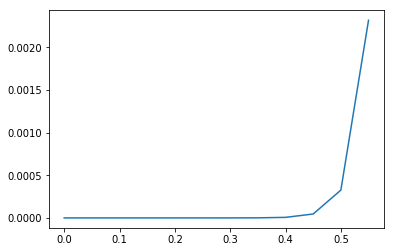

In [141]:
v = np.arange(0, 0.6, 0.05)   # V

k_b= 1.3806e-23     # J/K
q_e = 1.6022e-19    # C
T_r = 296           # Room temperature, in degrees Kelvin

v_t = k_b*T_r/q_e   # Thermal voltage, in Volts
i_s = 1e-12         # Saturation current, in Amperes

i = i_s*(np.exp(v/v_t) -1)
plt.plot(v, i)


## 5.1.5 Adding data points and error bars to graphs
To include errorbars, use the [errorbar] function. Returning to the pendulum example, the *error* vector *err_t* must be the same size as the primary data vectors *L* and *Tm*, so we use [np.ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html) to make an array of ones that has the same size as *T*, and multiply this vector by the constant uncertainty *alphaT*.

Text(0, 0.5, 'Period (s)')

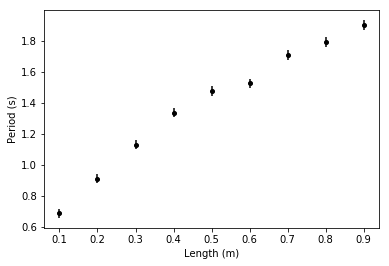

In [142]:
err_t = alpha_t * np.ones(Tm.shape)

plt.errorbar(L, Tm, err_t, fmt='ko', markersize=4)

plt.xlabel('Length (m)')
plt.ylabel('Period (s)')

Now plot *Tm\**2* versus *L* to linearize the graph. Remember that we also need to propagate the uncertainty in *Tm* to produce the correct uncertainty in *Tm\**2*; we'll use the calculus-based method of Sec. 4.1.2.

Text(0, 0.5, '(Period)$^2$ ($s^2$)')

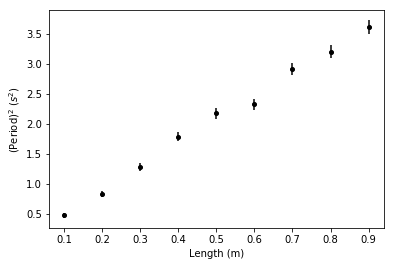

In [143]:
Tm_sq = Tm**2
alpha_tm_sq = 2 * alpha_t * Tm

plt.errorbar(L, Tm_sq, alpha_tm_sq, fmt='ko', markersize=4)
plt.xlabel('Length (m)')
plt.ylabel('(Period)$^2$ ($s^2$)')

## 5.1.6 Adding a fit or trend line

<--- Fitting procedure in Python --->

### Step 1: Import packages

In [144]:
# Alias scipy as sp
import scipy as sp
# scipy.optimize for the curve_fit function
import scipy.optimize
from scipy.optimize import curve_fit

# note that numpy has been already imported 

### Step 2: Load the data
In this example we are using *L and Tm* and we don't need to load the data.


### Step 3: Plot the data
Change the variable names, title, axis labels, etc, as appropriate.

### Step 4: Define the model function
Revise to define your own model function.

In [156]:
# Define model function
def model(x, a , b):
    return a * x**b

### Step 5: Choose initial parameter values for the model

Select your initial parameters, select an appropriate range for your independent variable, and check that the resulting model curve is reasonably close to your data. Adust and repeat if they don't match.

10


<ErrorbarContainer object of 3 artists>

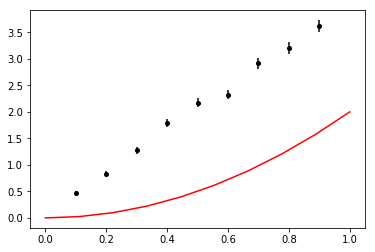

In [157]:
# Set initial parameters m0 and b0
m_init = 2
b_init = 2

# Define new frequency array, fModel, for displaying the model
f_model = np.linspace(0, 1, 10)

# Make the plot
# Recall the order of the arguments in the model definition, model(x,m,b):
print(len(f_model))
plt.plot(f_model,model(f_model,m_init,b_init),'r-')
plt.errorbar(L, Tm_sq, alpha_tm_sq, fmt='ko', markersize=4)

# Uncomment and revise the following lines to format plot
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Voltage (mV)')
# plt.title('Data with linear model, initial parameters')
# plt.xlim(0,120)
# plt.ylim(0,250)



### Step 6: Fit the model to the data
<--- explain the process --->

In [167]:
# Fit the model to the data and display results
# The order of the parameter array elements p0, pOpt, and pCov
# are determined by their order [m,b] in the model definition, model(x,m,b):
pOpt, pCov = curve_fit(model, L, Tm, p0=[m_init,b_init], sigma=alpha_tm_sq, absolute_sigma=True)
print("[mOpt bOpt] =", pOpt, '\n')

print("pCov =")
print(pCov)

[mOpt bOpt] = [1.99710592 0.46929464] 

pCov =
[[0.00429459 0.00153534]
 [0.00153534 0.00087352]]


< --- fitting process ---> 

Text(0, 0.5, '(Period) (s)')

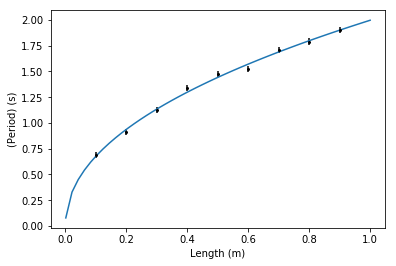

In [170]:
L_model = np.linspace(1e-3, 1)
plt.plot(L_model, model(L_model, pOpt[0], pOpt[1]))
plt.errorbar(L, Tm, err_t, fmt='ko', markersize=2)
plt.xlabel('Length (m)')
plt.ylabel('(Period) (s)')

## 5.1.7 Adding a title or caption

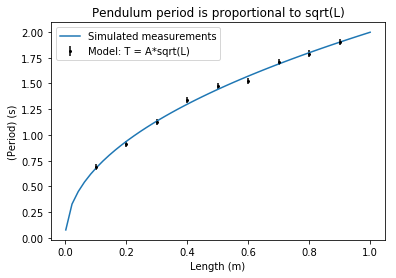

In [177]:
L_model = np.linspace(1e-3, 1)
plt.plot(L_model, model(L_model, pOpt[0], pOpt[1]))
plt.errorbar(L, Tm, err_t, fmt='ko', markersize=2)
plt.xlabel('Length (m)')
plt.ylabel('(Period) (s)')

plt.title('Pendulum period is proportional to sqrt(L)')
plt.legend(['Simulated measurements','Model: T = A*sqrt(L)'])

### 5.2 Using a graph to see trends in the data
Reproduce Fig. 5.5. The text gives the fit parameters, and we can estimate the noise level from the tail in Fig. 5.5(b).